In [2]:
!pip install pystan

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving My data modified.csv to My data modified (4).csv
User uploaded file "My data modified.csv" with length 35090 bytes


In [126]:
import pystan
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("My data modified (4).csv", encoding = "latin-1")


data

,Your name,Grocery store brand,Product 1 brand,Product 1 price (â¬),Product 2 brand,Product 2 price (â¬),Product 3 brand,Product 3 price (â¬),Product 1 brand.1,Product 1 price (â¬).1,...,Product 2 price (â¬).8,Product 3 brand.8,Product 3 price (â¬).8,Product 1 brand.9,Product 1 price (â¬).9,Product 2 brand.9,Product 2 price (â¬).9,Product 3 brand.9,Product 3 price (â¬).9,Neighborhood
0,Jennifer Yang,Lidl,Royal Gala,2.49,Ambriosa,2.49,Normal red apples,1.40,Normal banana,1.09,...,2.020,Bio eggs no brand,3.300,Land Junker,6.48,NaN,NaN,NaN,NaN,Mitte
1,Trent Hommeyer,ALDI,Honeycrunch,2.72,Braeburn,1.39,South African,2.99,No brand,1.09,...,3.300,Eier aus Bodenhaltung,1.290,Friches,6.98,Frisches,7.48,NaN,NaN,SchÃ¶neberg
2,Jennifer Yang,EDEKA,Royal Gala,1.99,Pink Lady,2.99,Braeburn,1.99,Normal banana,1.09,...,2.380,Bio eggs,4.980,No brand,6.98,NaN,NaN,NaN,NaN,Mitte
3,Shiao-li,EDEKA,Kissed By Nature,1.99,Pink Lady,2.93,Edeka,1.99,Edeka,0.88,...,3.380,Gut & Gunstig,1.550,Stolle,9.99,Biofino,25.99,Meine Fleischerei,9.99,Kreuzberg
4,Huey Ning Lok,ALDI,Apfel Evelina,1.79,Apfel Tenroy/Royal Gala,1.39,Apfel rot Honeycrunch,2.74,Gut Bio Fairtrade Bio Bananen,1.65,...,2.030,Eier aus Bodenhaltung,1.550,Gut Bio Hahn-Brustfilet,19.99,meine MetzGerei Hahnchen Brustfilet Teilstuck,6.48,NaN,NaN,Prenzlauer Berg
5,Vini Miranda,Lidl,Bio Organic,3.13,no brand,1.00,no brand,1.40,Fairglobe,1.69,...,1.550,Eier Aus Freidlandhaltung,2.030,Landjunker,6.98,NaN,NaN,NaN,NaN,Mitte
6,Vini Miranda,EDEKA,Granny Smith,1.99,Golden Deli,1.99,Braeburn,1.99,Bio Bananen,1.99,...,2.030,Edeka,4.190,Le Gaulois,13.90,Friki,12.99,NaN,NaN,Mitte
7,Ewa Szyszka,ALDI,Gutbio,4.38,Kissedbynature evelina,1.99,Pink lady,2.79,Bio fairtrade bananen,1.69,...,2.800,Gutbio A,3.300,Gutbio,7.00,Maine metzgerei,6.99,Fair&gut,8.00,NeukÃ¶lln
8,Ewa Szyszka,REWE,Rewe beste wahl,1.52,Pink lady,3.98,Regional,1.99,Chiquita,1.99,...,1.290,Rewe bio,3.200,No brand,6.59,No brand,6.99,Ja,4.88,Kreuzberg
9,Qiusu Wang,EDEKA,Elstar,1.99,Holsteiner cox,1.99,Tafelaepfel,1.99,bio bananen,1.79,...,1.290,EDEKA,3.490,Gut&Gunstig,7.40,NaN,NaN,NaN,NaN,NeukÃ¶lln


In [0]:
prices = []
df_b=data.loc[:, ::2]
df_b=df_b.drop(["Your name"], axis=1)
df_b=df_b.drop(["Neighborhood"], axis=1)

brand_columns = list(df_b)
brands = []
for item in brand_columns:
    brands.append(list(df_b[item][:]))
    
# Flatten list
brands = [item for sublist in brands for item in sublist]

del_indexes_b=[]

# Identify NaN's
for i in range(len(brands)):
    if type(brands[i])!=type("x"):
        del_indexes_b.append(i)

# Delete NaN's
for i in del_indexes_b[::-1]:
    del brands[i]


# Transform the brands into either "branded" or not "branded"
# Remove spacing and make everything lowercase
brands = [(''.join(item.split())).lower() for item in brands]

brands_code=[]

# If an item is branded, its code will be 2
counter = 0
for item in brands:
    if item == "nobrand":
        brands_code.append(1)
        counter+=1
    else:
        brands_code.append(2)

In [0]:
import math


zones = list(data["Neighborhood"][:])
categories_z = list(set(zones))
for i in range(len(categories_z)):
    for j in range(len(zones)):
        if categories_z[i] == zones[j]:
            zones[j] = i+1
zones = zones*30

stores = list(data["Grocery store brand"][:])
categories_s = list(set(stores))
for i in range(len(categories_s)):
    for j in range(len(stores)):
        if categories_s[i] == stores[j]:
            stores[j] = i+1
stores = stores*30


# This leaves us with only the columns that contain prices
prices = []
df_p=data.drop(["Your name"], axis=1)
df_p=df_p.loc[:, ::2]
df_p =df_p.drop(["Grocery store brand"], axis = 1)

price_columns = list(df_p)
prices = []
for item in price_columns:
    prices.append(list(df_p[item][:]))

num_of_products = len(prices)/3
num_of_collectors=len(prices[0])

types=[]
for i in range(int(num_of_products)):
    types.append([i+1]*num_of_collectors*3)
    

    
# Flatten the list of lists into a single list with all prices
prices = [item for sublist in prices for item in sublist]

# Do the same for the types of products
types = [item for sublist in types for item in sublist]
del_indexes = []
for i in range(len(prices)):
    if math.isnan(prices[i]):
        del_indexes.append(i)
        
# We reverse the list so that we delete the element we want without 
# moving the rest we haven't deleted.
for i in del_indexes[::-1]:
    del prices[i]
    del zones[i]
    del stores[i]
    del types[i]


In [0]:
# This should tell us if there are any inconsistencies
# such as a brand without a price or a price without a brand.
for index in del_indexes_b:
    if index not in del_indexes:
        print(index)

for index in del_indexes:
    if index not in del_indexes_b:
        print(index)
        

In [0]:
stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {
    int<lower=1> num_items;  // number of items we have
    real<lower=0> prices[num_items];  // list with prices 
    int<lower=0> brands[num_items];  // list with brand of item
    int<lower=0> items[num_items];  // list with type of item
    int<lower=0> stores[num_items];  // list with stores
    int<lower=0> zones[num_items];  // list with zones of stores
    int<lower=1> num_brands;  // number of brands we have
    int<lower=1> num_item;  // number of items we have
    int<lower=1> num_stores;  // number of stores we have
    int<lower=1> num_zones;  // number of zones we have

    
    real<lower=0> alpha; // fixed prior hyperparameter for price (1.0)
    real prior_multi_mu;  // fixed prior for multipliers mean (0.0)
    real prior_multi_sig;  // fixed prior for multipliers sigma (0.25)
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    // We have to make a price parameter for every product
    real<lower=0> p[num_item];   // Gives the base price for a product
    
    // Multiplier for each brand
    real<lower=0> b[num_brands];  // Multiplier depending on the brand. 
                                  // No brand makes it 1. Centered around 1.
                              
    // Multiplier for the store
    real<lower=0> s[num_stores];  // Multiplier depending on the type of store.
                                  // Centered around 1.
    
    //Multiplier for location
    real<lower=0> z[num_zones];  // Multiplier for the zone of the store.
                                 // Centered around 1.
                      
    //For  standard deviation errors
    real<lower=0> e;  // Accounts for random fluctuations
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    p ~ cauchy(0,alpha);  // prior over price.
    b ~ lognormal(prior_multi_mu,prior_multi_sig);  //prior over brand.
    s ~ lognormal(prior_multi_mu,prior_multi_sig);  //prior over store type.
    z ~ lognormal(prior_multi_mu,prior_multi_sig);  //prior over zone.
    
    e ~ inv_gamma(3,.5);  // This error term is fixed to always try to be small.
    
    for(i in 1:num_items){
        prices[i] ~ normal(p[items[i]]*b[brands[i]]*s[stores[i]]*z[zones[i]],e);
    }
}

"""

In [0]:
data_ = {
        'num_items':int(len(prices)) ,
        'prices': prices,
        'brands': brands_code,
        'items': types,
        'stores': stores,
        'zones': zones,
    
        'num_brands':len(set(brands_code)),
        'num_item':len(set(types)),
        'num_stores':len(set(stores)),
        'num_zones':len(set(zones)),
    
    
        'alpha':1.0,
        'prior_multi_mu':0,
        'prior_multi_sig':0.25}

The data for the stores I visited was collected on the afternoon of October 31st. The ALDI store was visited at 5:30 p.m. and the EDEKA was visited at around 6:15 p.m.
<br>
<br>
For the statistical model I generated 5 sets of parameters to help predict the price of an item based on some of its characteristics and its retailer's. The parameter p is a list that contains 10 parameters. Each of these is to estimate the base price of the 10 items we seek to estimate (apples, bananas, tomatoes, potatoes, etc.). 
<br>
<br>
The parameter b is also a list of 2 parameters that estimate the multiplier for whether said item has a brand or doesn't. The second of these two is for the branded options.
<br>
<br>
Parameter s contains 4 to represent each of the 4 stores from where samples were taken. They also are multipliers to help determine if buying in a specific store would make the items cheaper due to the supermarket chain.
<br>
<br>
Parameter z contains the values for the multipliers that depend on the zone where the supermarket was located. These zones were divided by neighborhood inside Berlin and by city, outside of it. The two zones outside of Berlin considered were Cape Town and London.
<br>
<br>
The prior_multi_mu and prior_multi_sig are the prior hyperparameters for the lognormal distributions for the multiplier parameters.This way we can change how much variation we want to have and where to place the mean for those parameters. Since the multipliers are centered around 1, the mu must have a value of 1. 

In [124]:
# Compile model

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_516d60e62fb58d890ae4ba2f7d411212 NOW.
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /tmp/tmpmlvojmac/stanfit4anon_model_516d60e62fb58d890ae4ba2f7d411212_2409782796092191928.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [0]:
results = stan_model.sampling(data=data_)

In [146]:
print(results.stansummary())

Inference for Stan model: anon_model_516d60e62fb58d890ae4ba2f7d411212.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p[1]    1.65    0.01   0.34   1.09    1.4   1.61   1.85   2.39    830    1.0
p[2]    1.09  7.9e-3   0.24    0.7   0.92   1.07   1.24   1.61    914    1.0
p[3]    2.62    0.02   0.53   1.74   2.23   2.58   2.96   3.79    816    1.0
p[4]     1.0  7.4e-3   0.23   0.63   0.83   0.98   1.13   1.49    921    1.0
p[5]    0.78  5.8e-3   0.19   0.48   0.65   0.77    0.9   1.21   1025    1.0
p[6]    1.81    0.01   0.38   1.19   1.54   1.77   2.04   2.63    827    1.0
p[7]    0.72  5.3e-3   0.17   0.44    0.6   0.71   0.83    1.1   1062    1.0
p[8]    2.89    0.02   0.58   1.92   2.46   2.84   3.25   4.12    805    1.0
p[9]    1.93    0.01    0.4   1.27   1.65   1.89   2.17   2.79    831    1.0
p[10]   7.88    0.06   1.58   5.27   6.72

In [0]:
items = ["Apples","Bananas","Tomatoes","Potatoes","Flour","Rice",
         "Milk","Butter","Eggs","Chicken Breasts"]

The 95% confidence interval for the price for Apples is [1.0871765751451485, 2.3895089845586654]
The mean of its base price is 1.6468195696257162

The 95% confidence interval for the price for Bananas is [0.7022622764161182, 1.6122810490203594]
The mean of its base price is 1.0929780130341178

The 95% confidence interval for the price for Tomatoes is [1.7375418626928996, 3.7750020636675297]
The mean of its base price is 2.624984471734822

The 95% confidence interval for the price for Potatoes is [0.6271695071401029, 1.4911587682205394]
The mean of its base price is 0.995026482275179

The 95% confidence interval for the price for Flour is [0.4816727075417234, 1.2058490174628413]
The mean of its base price is 0.7834990816890983

The 95% confidence interval for the price for Rice is [1.1935700402663818, 2.6291464812893786]
The mean of its base price is 1.8100540268125824

The 95% confidence interval for the price for Milk is [0.4398431034689608, 1.1031114843446095]
The mean of its base pr

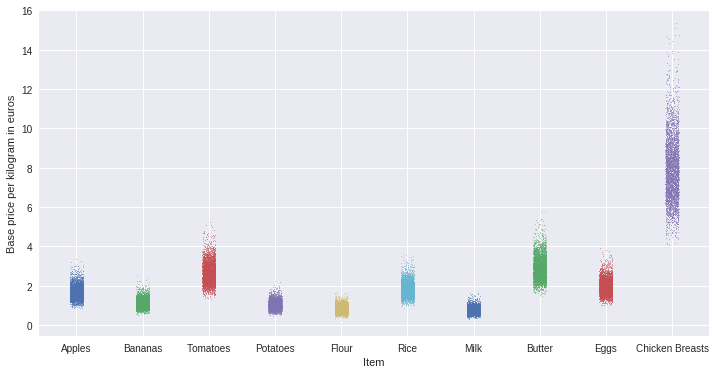

The 95% confidence interval for the multiplier for No brand is [0.7314134973436447, 1.3923497745094096]
The mean of its multiplier is 1.0135915265927034

The 95% confidence interval for the multiplier for Branded is [0.9064337680635076, 1.7302852919504514]
The mean of its multiplier is 1.2552829713170508



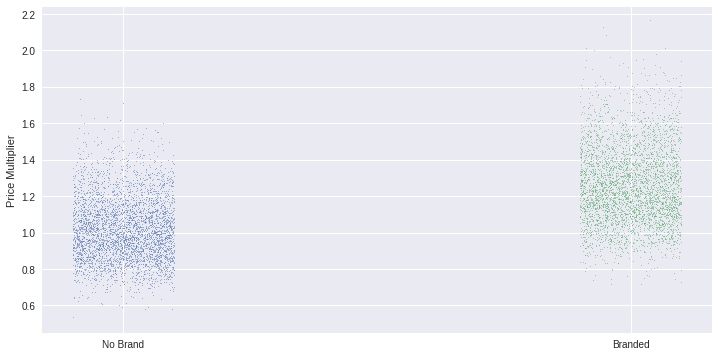

The 95% confidence interval for the multiplier for ALDI is [0.7981713527221881, 1.3026274652638452]
The mean of its multiplier is 1.0254429541655319

The 95% confidence interval for the multiplier for EDEKA is [0.9475707355897824, 1.520349087157744]
The mean of its multiplier is 1.2070106339711484

The 95% confidence interval for the multiplier for Lidl is [0.6637120767332867, 1.080736740306449]
The mean of its multiplier is 0.8516045645671497

The 95% confidence interval for the multiplier for REWE is [0.9483500152257779, 1.536593897503427]
The mean of its multiplier is 1.2171442637820222



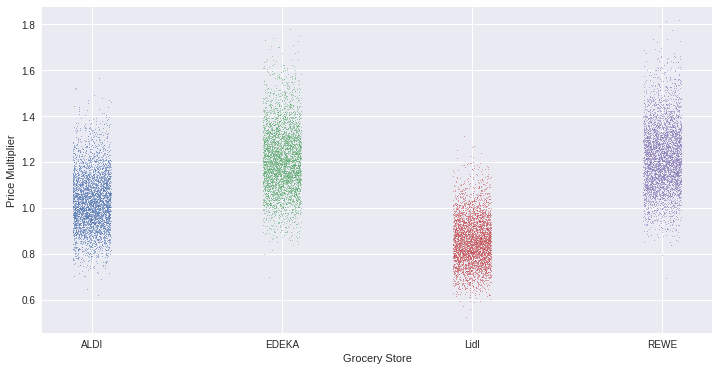

The 95% confidence interval for the multiplier for Mitte is [0.9936177480778997, 1.3552116861122556]
The mean of its multiplier is 1.162112488170597

The 95% confidence interval for the multiplier for Alt-Treptow is [0.8289818520698923, 1.1856423522378448]
The mean of its multiplier is 0.9979373862146004

The 95% confidence interval for the multiplier for Kreuzberg is [0.9967244629963502, 1.371342955191309]
The mean of its multiplier is 1.1700031738609855

The 95% confidence interval for the multiplier for NeukÃ¶lln is [0.7662603716436102, 1.0634025493400716]
The mean of its multiplier is 0.9039670474171543

The 95% confidence interval for the multiplier for London is [0.7139939478013136, 1.030216283539045]
The mean of its multiplier is 0.8622016580254392

The 95% confidence interval for the multiplier for Tempelhof is [0.9955237748016391, 1.562048201210428]
The mean of its multiplier is 1.259572106940881

The 95% confidence interval for the multiplier for Friedrichshain is [0.94848684

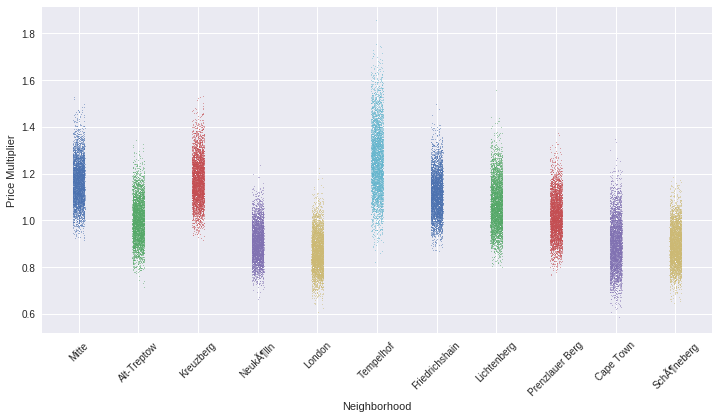

In [149]:
from scipy import stats
samples =results.extract()

plt.figure(figsize=(12,6))
for i in range(10):
    plt.plot(stats.uniform.rvs(loc=i+1-0.1, scale=0.2, size=4000),
             samples['p'][:,i], ',', alpha=0.5)  

dat = np.percentile(samples['p'], [2.5, 97.5], axis=0)
new_dat =[]
for i in range(len(dat[1])):
    new_dat.append([dat[0][i],dat[1][i]])
for i in range(len(new_dat)):
    print("The 95% confidence interval for the price for", items[i], "is", new_dat[i])
    print("The mean of its base price is", np.mean(samples['p'][:,i]))
    print()
    

plt.ylabel("Base price per kilogram in euros")    
plt.xlabel("Item")
plt.xticks(range(1,11), items)
plt.show()



plt.figure(figsize=(12,6))
for i in range(2):
    plt.plot(stats.uniform.rvs(loc=i+1-0.1, scale=0.2, size=4000),
             samples['b'][:,i], ',', alpha=0.5)

    
categories_b = ["No brand", "Branded"]
dat = np.percentile(samples['b'], [2.5, 97.5], axis=0)
new_dat =[]
for i in range(len(dat[1])):
    new_dat.append([dat[0][i],dat[1][i]])
for i in range(len(new_dat)):
    print("The 95% confidence interval for the multiplier for", categories_b[i], "is", new_dat[i])
    print("The mean of its multiplier is", np.mean(samples['b'][:,i]))
    print()
    
plt.xticks(range(1,3), ["No Brand", "Branded"])
plt.ylabel("Price Multiplier")    
plt.show()  



plt.figure(figsize=(12,6))
for i in range(4):
    plt.plot(stats.uniform.rvs(loc=i+1-0.1, scale=0.2, size=4000),
             samples['s'][:,i], ',', alpha=0.5)

dat = np.percentile(samples['s'], [2.5, 97.5], axis=0)
new_dat =[]
for i in range(len(dat[1])):
    new_dat.append([dat[0][i],dat[1][i]])
for i in range(len(new_dat)):
    print("The 95% confidence interval for the multiplier for", categories_s[i], "is", new_dat[i])
    print("The mean of its multiplier is", np.mean(samples['s'][:,i]))
    print()
    
plt.xticks(range(1,5), categories_s)
plt.ylabel("Price Multiplier")    
plt.xlabel("Grocery Store")
plt.show()  



plt.figure(figsize=(12,6))
for i in range(11):
    plt.plot(stats.uniform.rvs(loc=i+1-0.1, scale=0.2, size=4000),
             samples['z'][:,i], ',', alpha=0.5)

dat = np.percentile(samples['z'], [2.5, 97.5], axis=0)
new_dat =[]
for i in range(len(dat[1])):
    new_dat.append([dat[0][i],dat[1][i]])
for i in range(len(new_dat)):
    print("The 95% confidence interval for the multiplier for", categories_z[i], "is", new_dat[i])
    print("The mean of its multiplier is", np.mean(samples['z'][:,i]))
    print()
    
plt.xticks(range(1,12), categories_z, rotation=45)
plt.ylabel("Price Multiplier")    
plt.xlabel("Neighborhood")
plt.show()  

An item with no brand seems to have a multiplier of 1 on average. However, its confidence interval is very wide and it covers from .73 to 1.39. Branded products have a multiplier of 1.25  with a confidence interval that goes from .90 to 1.73 making it very wide too. The brands were divided into these 2 groups because if we had to consider every single brand, the model would cover more than 600 brands and that would be excessive. 
<br>
<br>
For the supermarket chains, we can notice that the one with the lowest multiplier is Lidl with a value of .85. Aldi has a sort of neutral multiplier with 1.02 but its confidence interval covers the range from .798 to 1.302. EDEKA and REWE have very similar multipliers at 1.207 and 1.217. Their confidence intervals are almost the same too ranging from .947 to 1.52 and .948 to 1.536 respectively.
<br>
<br>
From all of our results we can note that the largest expected effect of amultiplier per zone is around 1.56 and that would be at the edge of the 95% confidence interval of Tempelhof. It also seems to be that the zones with the cheapest food are Neukolln, London and Schoneberg. Cape Town can also be as cheap as Schoneberg but it has a larger variation that makes its interval completely surrounds Schoneberg's. 

Edits to the data:
<br>
+ First row was deleted as it was a duplicate of the 2nd.
+ Row 19 was deleted as the brands of the products were blanks and didn't seem to be submitted as "No brand".
+ The value for row 38 column V was deleted as it didn't have a brand or "no brand" assigned.

The data that includes the cost of rent in a neighborhood was collected with Soren Gran. Every store in Berlin is assigned a cost of rent based on their closest U-Bahn or S-Bahn station found in [this map](https://www.immobilienscout24.de/content/dam/is24/ibw/dokumente/mietmap-berlin-2017.jpg). Afterwards, the average price for the cost of rent in the neighborhood was computed by taking the average of all the supermarkets included in the sample that are located in that zone. 




https://www.immobilienscout24.de/content/dam/is24/ibw/dokumente/mietmap-berlin-2017.jpg

In [135]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving rent.csv to rent (1).csv
User uploaded file "rent.csv" with length 1053 bytes


In [0]:
rent = pd.read_csv("rent.csv", encoding = "latin-1")

In [141]:
neighborhoods = list(rent["Neighborhood"][:])
rents = list(rent["Rent"][:])
# We make a variable for each neighborhood in same order as categoriez_z

avg_price = np.array([0]*9)
for i in range(len(rents)):
    if neighborhoods[i]=="Mitte":
        avg_price[0]+=rents[i]
    elif neighborhoods[i]=="Alt-Treptow":
        avg_price[1]+=rents[i]
    elif neighborhoods[i]=="Kreuzberg":
        avg_price[2]+=rents[i]
    elif neighborhoods[i]=="Neukolln":
        avg_price[3]+=rents[i]
    elif neighborhoods[i]=="Tempelhof":
        avg_price[4]+=rents[i]
    elif neighborhoods[i]=="Friedrichshain":
        avg_price[5]+=rents[i]
    elif neighborhoods[i]=="Lichtenberg":
        avg_price[6]+=rents[i]
    elif neighborhoods[i]=="Prenzlauer Berg":
        avg_price[7]+=rents[i]
    elif neighborhoods[i]=="Schoneberg":
        avg_price[8]+=rents[i]
    else: # in case we're missing something
        print("fail")
        

avg_price[0]/= neighborhoods.count("Mitte")
avg_price[1]/= neighborhoods.count("Alt-Treptow")
avg_price[2]/= neighborhoods.count("Kreuzberg")
avg_price[3]/= neighborhoods.count("Neukolln")
avg_price[4]/= neighborhoods.count("Tempelhof")
avg_price[5]/= neighborhoods.count("Friedrichshain")
avg_price[6]/= neighborhoods.count("Lichtenberg")
avg_price[7]/= neighborhoods.count("Prenzlauer Berg")
avg_price[8]/= neighborhoods.count("Schoneberg")

# makes sure again all data is being used.
print(len(neighborhoods)==
      neighborhoods.count("Mitte")
     +neighborhoods.count("Alt-Treptow")+neighborhoods.count("Kreuzberg")
     +neighborhoods.count("Neukolln")+neighborhoods.count("Tempelhof")
     +neighborhoods.count("Friedrichshain")+neighborhoods.count("Lichtenberg")
     +neighborhoods.count("Prenzlauer Berg")+neighborhoods.count("Schoneberg"))
print(avg_price)

True
[974 811 922 843 755 854 777 957 856]


In [145]:
zone_multipliers = np.mean(samples['z'], axis=0) #We take their mean values

# We don't have rent values for neither London nor Cape Town so they're deleted.
# Their multipliers were the 5th and 10th respectively
zone_multipliers = np.delete(zone_multipliers,[4,9])

print(zone_multipliers)
print()
print("The results for the pearsonr test are:",
      stats.pearsonr(avg_price, zone_multipliers))

[1.16211249 0.99793739 1.17000317 0.90396705 1.25957211 1.11077478
 1.06473399 1.01375049 0.89009335]

The results for the pearsonr test are: (-0.01753661859869888, 0.9642838482756076)


These results show that the correlation between the multiplier on food and the rent in a neighborhood is almost null. The odds of getting data randomly with this amount of correlation are of around 96% showing it is very easy.